# 自分で深層学習を実装してみる！！

# 3桁の２進数を、１０進数に変換するネット

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(sum_squared_error, y, teach, w):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001
    loss = sum_squared_error(y, teach)

    return (sum_squared_error(w+h)-sum_squared_error(w-h))/(2*h)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y


dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, x, y, teach, network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



In [ ]:
import numpy as np

def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result


# ごっちゃになってしまったので、作り直し 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y

def bibun_numerical_gradient(sum_squared_error ,ywh1, ywh2):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001

    return (sum_squared_error(ywh1)-sum_squared_error(ywh2))/(2*h)




dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y1 = forward(network, x)
    y2 = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, , network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



In [ ]:
import numpy as np
import pprint
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3]
    return network




w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす


w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
b2 = np.array([[0.1, 0.2, 0.5, 0.3, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]]) #バイアスを8つのニューロンにたす

network = set_network(w1,b1,w2,b2,w3,b3)
pprint.pprint(network)
print("-------------------------------------------")
network[1][0][0] += 0.001
pprint.pprint(network)
print(len(network))

network1_zeros = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]

print(network1_zeros)



# ↓すぐ動かせます↓

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
from tqdm import trange


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 7
W3 = 8
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
# w1 = np.random.random([3,W1])*1.4
w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))

#バイアスを8つのニューロンにたす
b1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W1))
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1.4
w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5つのニューロンにたすバイアス
b2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W2))
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1.4
w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W3))

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in trange(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------end_learning_result_network・・・-------")
pprint.pprint(Network)
print("------endnetwork-------")
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

In [ ]:
w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))

#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1.4
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1.4
w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1.4
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1.4
w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.random([1,W3])*1.4

print(w1)
print("----------------")
print(w2)
print("----------------")
print(w3)
print("----------------")


In [ ]:
import numpy as np
import pprint


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list
    return network






w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
               [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
               [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす
w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
               [0.2, 0.5, 0.1, 0.8, 0.1],
               [0.3, 0.6, 0.2, 0.5, 0.2],
               [0.2, 0.5, 0.4, 0.2, 0.3],
               [0.3, 0.6, 0.7, 0.3, 0.2],
               [0.2, 0.5, 0.3, 0.2, 0.5],
               [0.3, 0.6, 0.1, 0.1, 0.1],
               [0.2, 0.5, 0.1, 0.1, 0.2]]) #8つのニューロンから5つのニューロンに出力する際の重み
b2 = np.array([[0.1, 0.2, 0.2, 0.4, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
               [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
               [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
               [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
               [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]]) #バイアスを8つのニューロンにたす


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

pprint.pprint(Network)










koubai_list1 = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]
koubai_list2 = np.array(koubai_list)






w1 = np.random.random([3,8])
b1 = np.random.random([1,8])
w2 = np.random.random([8,5])
b2 = np.random.random([1,5])
w3 = np.random.random([5,8])
b3 = np.random.random([1,8])

Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

print("--------------------------------------------------")
pprint.pprint(Network)

print("--------------------------------------------------")
pprint.pprint(koubai_list1)

print("--------------------------------------------------")
pprint.pprint(koubai_list2)

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 4
W3 = 8


#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1000


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



# ５月１９日　ここから誤差逆伝播、MNISTなどをやる

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4]) #　　　名前か番号か迷う
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y, a1, z1, a2, z2, a3 #xを入力したnetworkで順伝播して得られた出力結果




def backward(network, in_x, y, teach, a1, z1, a2, z2, a3):
    # 出力層の誤差
    delta3 = (y - teach)
    
    # 隠れ層2の誤差
    delta2 = np.dot(delta3, network[4].T) * (a2 > 0)
    
    # 隠れ層1の誤差
    delta1 = np.dot(delta2, network[2].T) * (a1 > 0)
    
    # 重みとバイアスの勾配
    grad_w3 = np.dot(z2.T, delta3)
    grad_b3 = np.sum(delta3, axis=0)
    grad_w2 = np.dot(z1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_w1 = np.dot(in_x.T, delta1)
    grad_b1 = np.sum(delta1, axis=0)
    
    return [grad_w1, grad_b1, grad_w2, grad_b2, grad_w3, grad_b3]






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 8
W2 = 8
W3 = 8


#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([3,W1])*0.3

#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*0.3
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*0.3

#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*0.3
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*0.3
b3 = np.random.random([1,W3])*0.3

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 2500


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった

                out_y, a1, z1, a2, z2, a3 = forward(Network, in_x)
                loss1 = sum_squared_error(out_y,teach) #出力と教師データを比較し、誤差を計算する

                gradients = backward(Network, in_x, out_y, teach, a1, z1, a2, z2, a3)

                for j in range(len(Network)):
                    Network[j] -= gradients[j] * learning_rate
    # out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

# MNISTをダウンロードして読み込む

In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

print(x_train)
print(t_train)

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 60000
W1 = 8
W2 = 8
W3 = 784


w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1





#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 10


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,t_train) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,x_train)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,t_train) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,x_test)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , t_test)
print("入力＝" , x_test)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.3
#学習回数を定義
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
print(x_train.shape)

# ミニバッチ処理を追加する

### ↓バッチサイズ3のべた書きコード

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    in_x2, teach2 = make_input()#入力データと教師信号作成
    in_x3, teach3 = make_input()#入力データと教師信号作成
    in_x4, teach4 = make_input()#入力データと教師信号作成
    in_x5, teach5 = make_input()#入力データと教師信号作成
    in_x6, teach6 = make_input()#入力データと教師信号作成
    in_x7, teach7 = make_input()#入力データと教師信号作成
    in_x8, teach8 = make_input()#入力データと教師信号作成
    in_x9, teach9 = make_input()#入力データと教師信号作成
    in_x10, teach10 = make_input()#入力データと教師信号作成
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                out2_y1 = forward(Network1,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y1 = forward(Network1,in_x3)#そのNetworkで順伝播して出力を得る


                loss1_1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する
                loss1_2 = sum_squared_error(out2_y1,teach2) #出力と教師データを比較し、誤差を計算する
                loss1_3 = sum_squared_error(out3_y1,teach3) #出力と教師データを比較し、誤差を計算する
                loss1 = (loss1_1 + loss1_2 + loss1_3)/3 #ミニバッチ処理をするために誤差平均を計算


                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                out2_y2 = forward(Network2,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y2 = forward(Network2,in_x3)#そのNetworkで順伝播して出力を得る

                loss2_1 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                loss2_2 = sum_squared_error(out2_y2,teach2) #出力と教師データを比較し、誤差を計算する
                loss2_3 = sum_squared_error(out3_y2,teach3) #出力と教師データを比較し、誤差を計算する
                loss2 = (loss2_1 + loss2_2 + loss2_3)/3 #ミニバッチ処理をするために誤差平均を計算

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

#### バッチサイズ増やした版

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
np.random.seed(49)  # 再現性のために乱数シードを設定


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(12)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    in_x2, teach2 = make_input()#入力データと教師信号作成
    in_x3, teach3 = make_input()#入力データと教師信号作成
    in_x4, teach4 = make_input()#入力データと教師信号作成
    in_x5, teach5 = make_input()#入力データと教師信号作成
    in_x6, teach6 = make_input()#入力データと教師信号作成
    in_x7, teach7 = make_input()#入力データと教師信号作成
    in_x8, teach8 = make_input()#入力データと教師信号作成
    in_x9, teach9 = make_input()#入力データと教師信号作成
    in_x10, teach10 = make_input()#入力データと教師信号作成
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                out2_y1 = forward(Network1,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y1 = forward(Network1,in_x3)#そのNetworkで順伝播して出力を得る
                out4_y1 = forward(Network1,in_x4)#そのNetworkで順伝播して出力を得る
                out5_y1 = forward(Network1,in_x5)#そのNetworkで順伝播して出力を得る
                out6_y1 = forward(Network1,in_x6)#そのNetworkで順伝播して出力を得る
                out7_y1 = forward(Network1,in_x7)#そのNetworkで順伝播して出力を得る
                out8_y1 = forward(Network1,in_x8)#そのNetworkで順伝播して出力を得る
                out9_y1 = forward(Network1,in_x9)#そのNetworkで順伝播して出力を得る
                out10_y1 = forward(Network1,in_x10)#そのNetworkで順伝播して出力を得る

                loss1_1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する
                loss1_2 = sum_squared_error(out2_y1,teach2) #出力と教師データを比較し、誤差を計算する
                loss1_3 = sum_squared_error(out3_y1,teach3) #出力と教師データを比較し、誤差を計算する
                loss1_4 = sum_squared_error(out4_y1,teach4) #出力と教師データを比較し、誤差を計算する
                loss1_5 = sum_squared_error(out5_y1,teach5) #出力と教師データを比較し、誤差を計算する
                loss1_6 = sum_squared_error(out6_y1,teach6) #出力と教師データを比較し、誤差を計算する
                loss1_7 = sum_squared_error(out7_y1,teach7) #出力と教師データを比較し、誤差を計算する
                loss1_8 = sum_squared_error(out8_y1,teach8) #出力と教師データを比較し、誤差を計算する
                loss1_9 = sum_squared_error(out9_y1,teach9) #出力と教師データを比較し、誤差を計算する
                loss1_10 = sum_squared_error(out10_y1,teach10) #出力と教師データを比較し、誤差を計算する
                loss1 = (loss1_1 + loss1_2 + loss1_3 + loss1_4 + loss1_5 + loss1_6 + loss1_7 + loss1_8 + loss1_9 + loss1_10)/10 #ミニバッチ処理をするために誤差平均を計算



                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                out2_y2 = forward(Network2,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y2 = forward(Network2,in_x3)#そのNetworkで順伝播して出力を得る
                out4_y2 = forward(Network2,in_x4)#そのNetworkで順伝播して出力を得る
                out5_y2 = forward(Network2,in_x5)#そのNetworkで順伝播して出力を得る
                out6_y2 = forward(Network2,in_x6)#そのNetworkで順伝播して出力を得る
                out7_y2 = forward(Network2,in_x7)#そのNetworkで順伝播して出力を得る
                out8_y2 = forward(Network2,in_x8)#そのNetworkで順伝播して出力を得る
                out9_y2 = forward(Network2,in_x9)#そのNetworkで順伝播して出力を得る
                out10_y2 = forward(Network2,in_x10)#そのNetworkで順伝播して出力を得る

                loss2_1 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                loss2_2 = sum_squared_error(out2_y2,teach2) #出力と教師データを比較し、誤差を計算する
                loss2_3 = sum_squared_error(out3_y2,teach3) #出力と教師データを比較し、誤差を計算する
                loss2_4 = sum_squared_error(out4_y2,teach4) #出力と教師データを比較し、誤差を計算する
                loss2_5 = sum_squared_error(out5_y2,teach5) #出力と教師データを比較し、誤差を計算する
                loss2_6 = sum_squared_error(out6_y2,teach6) #出力と教師データを比較し、誤差を計算する
                loss2_7 = sum_squared_error(out7_y2,teach7) #出力と教師データを比較し、誤差を計算する
                loss2_8 = sum_squared_error(out8_y2,teach8) #出力と教師データを比較し、誤差を計算する
                loss2_9 = sum_squared_error(out9_y2,teach9) #出力と教師データを比較し、誤差を計算する
                loss2_10 = sum_squared_error(out10_y2,teach10) #出力と教師データを比較し、誤差を計算する
                loss2 = (loss2_1 + loss2_2 + loss2_3 + loss2_4 + loss2_5 + loss2_6 + loss2_7 + loss2_8 + loss2_9 + loss2_10)/10 #ミニバッチ処理をするために誤差平均を計算

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



#### ↓バッチサイズをすぐ指定できるように配列を使ったコードに変更

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()
print(dir(plt))






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

In [ ]:
BATCH_SIZE = 10
# out_y1=np.zeros(shape=(BATCH_SIZE,1,2))
print(out_y1)
print(out_y1)
p = forward(Network1,in_x[batch_out1])
print(p)
p.shape
# print(in_x)
# dfd,deed = make_input()
# print(dfd)
# print(deed)
# print(teach)

# 損失関数を表示

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
# np.random.seed(12)  # 再現性のために乱数シードを設定
np.random.seed(4)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.7
#学習回数を定義
learn = 550
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 1

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

# #繰り返し処理
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
#     for param in range(len(Network)): #パラメータの種類数だけ繰り返す
#         for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
#             for retsu in range(len(Network[param][gyou])): #列数サイズ取得

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
#                     loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
#                     loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

#     #作ったネットワークの性能検証（ただの順伝播をする）
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)
#     lossbatch1 = 0
#     lossbatch2 = 0

# A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
# print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()
print(dir(plt))






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する


def make_input0():
    x0 = 0
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input1():
    x0 = 0
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input2():
    x0 = 0
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input3():
    x0 = 0
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach







def make_input4():
    x0 = 1
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input5():
    x0 = 1
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input6():
    x0 = 1
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input7():
    x0 = 1
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach






IN = 3
W1 = 4
W2 = 5
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
# w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
# b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
# b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1
# b3 = np.random.random([1,W3])*1



# #学習率を定義
# learning_rate = 0.8
# #学習回数を定義
# learn = 350
# kaisuu = 0
# #バッチサイズを設定
# BATCH_SIZE = 2

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)


GRAPH_COUNT = 2000
#微小量hを定義
h = 0.01#0.01
# 
# graph_w1 = np.arange(0, GRAPH_COUNT/100, 0.01) #0から/10まで、0.01間隔で配列を作成

nyuuryoku0 = np.full(GRAPH_COUNT, 0)
nyuuryoku1 = np.full(GRAPH_COUNT, 1)
nyuuryoku2 = np.full(GRAPH_COUNT, 2)
nyuuryoku3 = np.full(GRAPH_COUNT, 3)
nyuuryoku4 = np.full(GRAPH_COUNT, 4)
nyuuryoku5 = np.full(GRAPH_COUNT, 5)
nyuuryoku6 = np.full(GRAPH_COUNT, 6)
nyuuryoku7 = np.full(GRAPH_COUNT, 7)
graphloss = np.array([])
graph_w_1 = np.array([])
graph_w_2 = np.array([])
graph_w_3 = np.array([])
# graphloss = np.empty(0) # = []のnumpy版

# Network1[param][gyou][retsu] += 0.1

# out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
# loss1 = sum_squared_error(out_y1,teach)#誤差計算
# np.append = (graphloss, loss1) #lossのリストを作る

# draw_graph(nyuuryoku0 , graph_w1 , graphloss)





Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]


# 繰り返し処理


in_x ,teach = make_input0()
Network1 = Network.copy()
Network1[4][2][2] -= 50*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach) #誤差計算
    graphloss = np.append(graphloss, loss1) #それをlossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_1, graphloss, label="input_0",)
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


######################################################################################################################



in_x ,teach = make_input1()
Network1 = Network.copy()
Network1[4][2][2] -= 100*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach) #誤差計算
    graphloss = np.append(graphloss, loss1) #それをlossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_1, graphloss, label="input_1")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)

######################################################################################################################
in_x ,teach = make_input2()
Network2 = Network.copy()
Network2[4][2][2] -= 100*0.2
for i in range(GRAPH_COUNT):

    Network2[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_2 = np.append(graph_w_2, Network2[4][2][2])
    # print("Network2=") 
    # pprint.pprint(Network2)
    out_y1 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_2, graphloss, label="input_2")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_2)
graphloss = np.array([])
graph_w_2 = np.array([])
print(graph_w_2)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################

in_x ,teach = make_input3()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_3")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input4()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_4")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input5()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_5")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input6()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_6")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################




in_x ,teach = make_input7()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("2→10進数変換の勾配曲面(横からみた図)", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_7")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
plt.plot(0,0,marker='8', color= "blue", markersize=10)
plt.legend()
plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################





















# #繰り返し処理
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
#     for param in range(len(Network)): #パラメータの種類数だけ繰り返す
#         for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
#             for retsu in range(len(Network[param][gyou])): #列数サイズ取得

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
#                     loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
#                     loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

#     #作ったネットワークの性能検証（ただの順伝播をする）
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)

# A = forward(Network,in_x_pre)

# print("------endnetwork-------")
# pprint.pprint(Network)
# print("教師＝" , teach)
# print("入力＝" , in_x)
# # A = change_one_hot(A)
# print("結果（確率）" , np.round(A*100,1))




# for i in range(GRAPH_COUNT):

#     Network1 = Network.copy()

#     Network1[0][0][0] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る 
#     out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
#     loss1 = sum_squared_error(out_y1,teach)#誤差計算
#     np.append = (graphloss, loss1) #lossのリストに追加


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)









# plt.plot(COUNT, LOSS)
# plt.xlabel("count")
# plt.ylabel("loss")
# plt.grid()
# plt.show()






#     # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
#     # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
#     # その二つの値を教師データと比較し、誤差を計算する
#     # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

#     # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

#     # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

#     # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

In [ ]:
import numpy as np

hoge =np.array([])
np.append(hoge, 1)

In [ ]:
print(np.append([-3, -2, -1], 1))
# [-3 -2 -1  0  1  2

# ごちゃごちゃしていたので整頓

In [ ]:
import numpy as np
import pprint
# import matplotlib～の前に！
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ####################
    # aはその層の入力の和のことです
    # bはバイアスのことです
    # zは出力です

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    print(a1)
    print(in_x)
    y = softmax (a3)

    return y , W1, W2, W3, b1, b2, b3, #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()


Network1 = Network.copy()



In [ ]:
AEL = 3
B= np.array([[10,10,-20, 10],[-20,10,20,20],[5,2,2]])

In [ ]:
import numpy as np

a = np.array([1, 2])

b = np.array([4, 3])

f = np.dot(a, b) # まずは２次元ベクトル同士の内積から。
print(f)
s = np.dot(a, a) # これでベクトルのノルムの２乗が出る。
print(s)

# 誤差逆伝播するぞ　まだできてない

In [ ]:
import numpy as np
import pprint
# import matplotlib～の前に！
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ##############################
    # aはその層の入力の和のことです
    # bはバイアスのことです
    # zは出力です
    # wは重み
    ##############################

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, z3 #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()


Network1 = Network.copy()



In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    # print(a3)
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, z1, z2, z3, a1, a2 #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理

in_x, teach = make_input()#入力データと教師信号作成

out_y1 = forward(Network,in_x)#順伝播、返り値：12個のパラメータ y,w123,b123,z123,a12の順
# print(type(out_y1))
# print("out_y1=")
# pprint.pprint(out_y1)

#偏微分係数を求める
loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）


koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

out3 = forward(Network, in_x)
loss = sum_squared_error(out3,teach)    
COUNT.append(i)
LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



# 誤差逆伝播できないから、工夫なくMNISTしてみる

In [ ]:
##############################################################################################################
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']


if __name__ == '__main__':
    init_mnist()

    # coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()

##############################################################################################################



import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach


x_train, t_train, x_test, t_test = load_mnist(flatten=True, normalize=True, one_hot_label=True)




IN = 784
W1 = 5
W2 = 7
W3 = 10
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.3
#学習回数を定義
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,t_train) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2, x_train)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,t_train) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=True)

# 誤差逆伝播実験
## ①順伝播してネットワークを用意する

![スクリーンショット 2023-06-26 174333.png](<attachment:スクリーンショット 2023-06-26 174333.png>)

In [1]:
# 入力３こ、隠れ層１層目３個、隠れそう２層目３個、出力層２個
import pprint
import numpy as np
np.random.seed(42)  # 再現性のために乱数シードを設定

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #その層のすべてのニューロンの入力にシグモイド関数をかけて出力を作成する。
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    return Z_ALL, FZ_ALL #xを入力したnetworkで順伝播して得られた出力結果

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# ニューロンの数を決める
IN = 3
W1 = 3
W2 = 3
W3 = 2

#初期の重みとバイアスを設定
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])
#バイアスを用意
b1 = np.random.random([1,W1])
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# 重みパラメータを保存
layer_num = len(W_ALL)-1 #層の数用の変数　０スタートにするため１減らしている
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# バイアスパラメータを保存

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]


2
W_ALL=
[array([[0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]]),
 array([[0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184]]),
 array([[0.51423444, 0.59241457],
       [0.04645041, 0.60754485],
       [0.17052412, 0.06505159]])]
B_ALL=
[array([[0.83244264, 0.21233911, 0.18182497]]),
 array([[0.45606998, 0.78517596, 0.19967378]]),
 array([[0.94888554, 0.96563203]])]


![スクリーンショット 2023-06-26 174333.png](<attachment:スクリーンショット 2023-06-26 174333.png>)
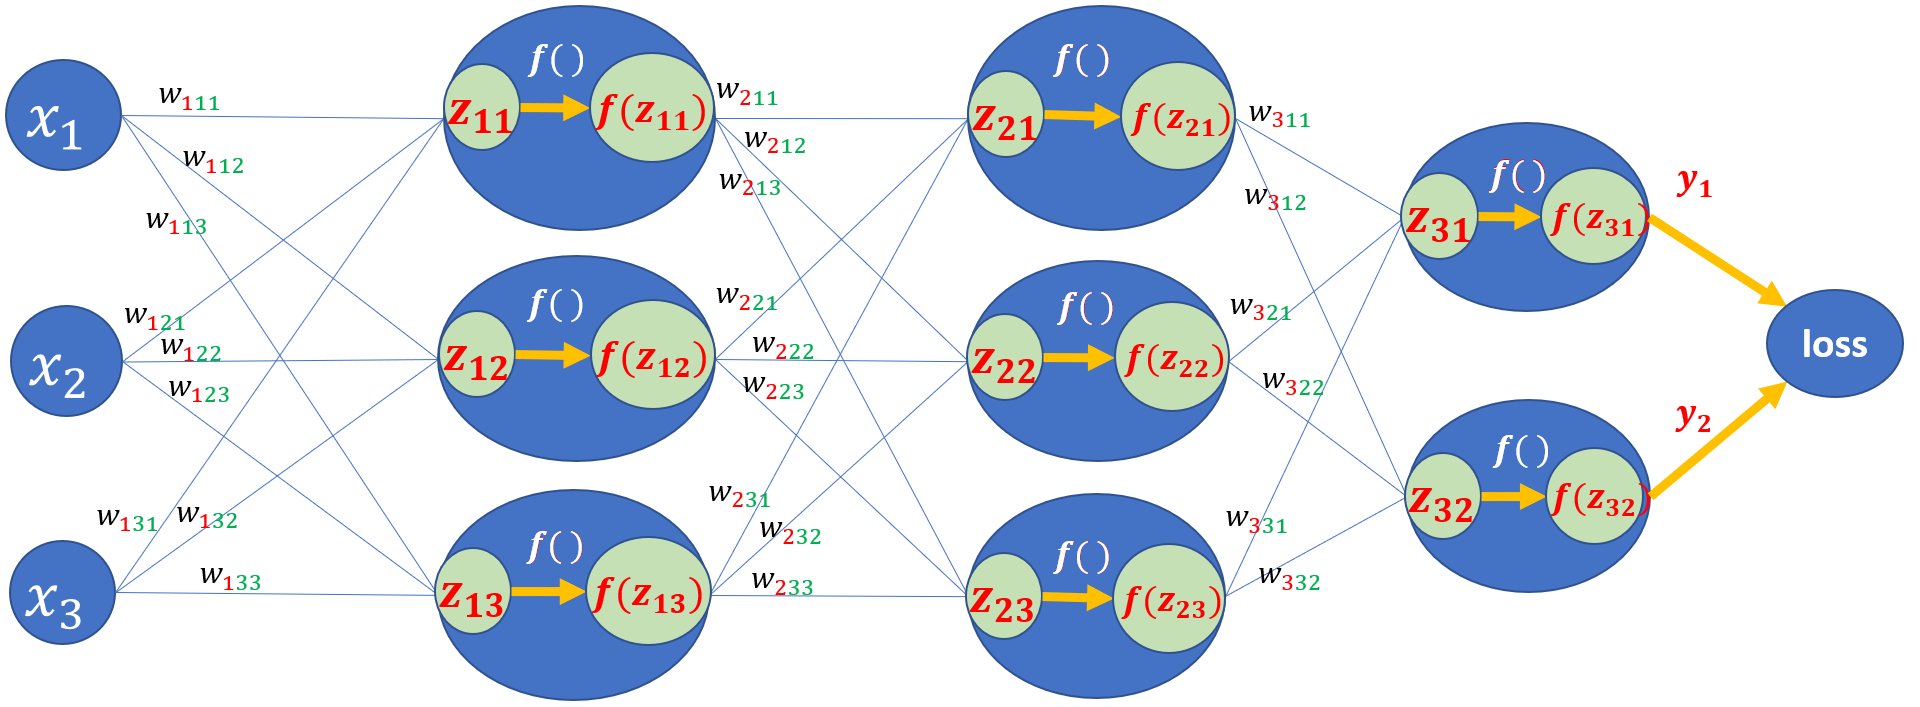

## ②逆伝播する　

In [ ]:
# ### 逆伝播計算をするために転値をしたりして形をそろえる 　ここでは転地してるけど，変微分するときに転地するから意味がないのでこれは実行しない

# print('z1=')
# pprint.pprint(z1)
# print('z1t=')
# z1t = np.transpose(z1)
# pprint.pprint(z1t)
# print('z1shape=')
# print(z1.shape)
# print('z1tshape=')
# print(z1t.shape)


# print('fz1=')
# pprint.pprint(fz1)
# print('fz1t=')
# fz1t = np.transpose(fz1)
# pprint.pprint(fz1t)
# print('fz1shape=')
# print(fz1.shape)
# print('fz1tshape=')
# print(fz1t.shape)


# print('z2=')
# pprint.pprint(z2)
# print('z2t=')
# z2t = np.transpose(z2)
# pprint.pprint(z2t)
# print('z2shape=')
# print(z2.shape)
# print('z2tshape=')
# print(z2t.shape)


# print('fz2=')
# pprint.pprint(fz2)
# print('fz2t=')
# fz2t = np.transpose(fz2)
# pprint.pprint(fz2t)
# print('fz2shape=')
# print(fz2.shape)
# print('fz2tshape=')
# print(fz2t.shape)


# print('z3=')
# pprint.pprint(z3)
# print('z3t=')
# z3t = np.transpose(z3)
# pprint.pprint(z3t)
# print('z3shape=')
# print(z3.shape)
# print('z3tshape=')
# print(z3t.shape)


# print('fz3=')
# pprint.pprint(fz3_y)
# print('fz3t=')
# fz3t = np.transpose(fz3_y)
# pprint.pprint(fz3t)
# print('fz3shape=')
# print(fz3_y.shape)
# print('fz3tshape=')
# print(fz3t.shape)


# print('teach')
# pprint.pprint(teach)
# print('teacht=')
# teacht = np.transpose(teach)
# pprint.pprint(teacht)
# print('teachshape=')
# print(teach.shape)
# print('teachtshape=')
# print(teacht.shape)

In [ ]:
from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    # print(len(FZ[layer_num]))
    # print(len(FZ[layer_num]))
    # print(Z[layer_num][0]) #layer_num番目の，０番目にｆｚの値が格納されている
    # print(len(Z[layer_num][0]))
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    print("start▲", triangle)
    # pprint.pprint(FZ)
    # pprint.pprint(Z)
    # pprint.pprint(triangle)
    # print(len(FZ))
    for gyou in range(len(FZ[layer_num][0])):
        # print("なか")
        # print((FZ[layer_num]))
        # pprint.pprint(triangle[0])
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
        # pprint.pprint(triangle)
    print("fin▲", triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #偏微分処理を行ったため，転置行列にする 大事！！
    print("star")
    pprint.pprint(star)
    return star


# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, ):
    square = np.zeros((len(W_ALL[layer_num][0]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成
    for square_gyou in range(len(W_ALL[layer_num][0])): 
        print("len(W_ALL[layer_num][0]) = ", len(W_ALL[layer_num][0]))
        print("(W_ALL[layer_num][0][0]) = ", (W_ALL[layer_num][0]))
        for square_retsu in range(len(W_ALL[layer_num][0][0])): #今見てる重みの層の，0番目の長さつまり行数を取得　その数だけ繰り返す
            print("確認", square_retsu, "回目のループです")
            print("FZ_ALL")
            pprint.pprint(FZ_ALL)
            # print(FZ_ALL[layer_num][square_retsu])
            print(FZ_ALL[layer_num][0][square_retsu])
            fzt = np.transpose(FZ_ALL[layer_num][0][square_retsu]) #指定の（今見てる）fzのn行目を転値したものを取り出す
        square[square_gyou][square_retsu] = fzt
    return square



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for i in trange (10): #適当 未定あとできめる
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播
    print("Z_ALL=")
    pprint.pprint(Z_ALL)
    print("FZ_ALL=")
    pprint.pprint(FZ_ALL)
    print("W_ALL=")
    pprint.pprint(W_ALL)

    # 逆伝播
    print("fz_all=")
    print(FZ_ALL)
    koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
    print("koubai=")
    pprint.pprint(koubai)
    layer_num_loop = layer_num
    for layer_num_loop in range(layer_num_loop, 1, -1): #進むごとにlayer_numを１ずつ減らしながら繰り返す 繰り返す数は層数ー１がいいんだよなでもそうするにはlayer_num分繰り返させてるからー１したいんだけどそうするとlayer_numの番号ごと－１にしちゃうから指定位置がずれちゃうんだよなくそ～ ！！解決！！0まで繰り返すんじゃなく1まで繰り返せば,層数ー１回繰り返すことが実現できる．そして最後の▲□の時はその次の層目という情報が必要だから，loopが終わったらlayer_num_loopはー１しておく必要がある．
        print("layer_num_loop=", layer_num_loop,"です．")
        triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loopも引数にとる
        koubai = np.dot(koubai, triangle)
        # pprint.pprint(W_ALL) 転地できてるか確認用
        star = grad_z_and_fz(W_ALL,) #★マークつまりi番目のｗの行列を返す
        koubai = np.dot(koubai, star)
        print("fin=", layer_num_loop)
    layer_num_loop -= 1 #これで，層数－１回の繰り返し処理が終わった後に最後の層を見るようになる
    print("layer_num_loop=", layer_num_loop)
    triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL)
    koubai = np.dot(koubai, triangle)
    square = grad_z_and_w(layer_num,)
    koubai = np.dot(koubai, square)

    print(koubai)
    W_ALL -= koubai*learning_rate
    
    
#学習後
print(W_ALL)





In [ ]:

# square変更実験
from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    print("start▲", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        # print("なか")
        # print((FZ[layer_num]))
        # pprint.pprint(triangle[0])
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
        # pprint.pprint(triangle)
    print("fin▲", triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #偏微分処理を行ったため，転置行列にする 大事！！
    print("star")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        print("------代入前↓--------")
        pprint.pprint(square)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        print("------代入後↓--------")
        pprint.pprint(square)
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく
        print("KOUBAILIST確認 = ")
        pprint.pprint(KOUBAILIST)

    print("loopをぬけました")
    print("KOUBAILIST確認 = ")
    pprint.pprint(KOUBAILIST)
    # 行列を連結する 1×３の行列３つのリストを，３×３の行列に変換させる ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    print("KOUBAILIST連結変換後 = ")
    pprint.pprint(KOUBAILIST)
    print("W_ALL前 = ")
    pprint.pprint(W_ALL[layer_num_loop])
    # W_ALL[layer_num_loop] -= KOUBAILIST*learning_rate
    print("W_ALL後 = ")
    pprint.pprint(W_ALL[layer_num_loop])
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for i in range (100): #適当 未定あとできめる
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播
    print("Z_ALL=")
    pprint.pprint(Z_ALL)
    print("FZ_ALL=")
    pprint.pprint(FZ_ALL)
    print("W_ALL=")
    pprint.pprint(W_ALL)

    # 逆伝播
    print("fz_all=")
    print(FZ_ALL)
    koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
    print("koubai=")
    pprint.pprint(koubai)
    layer_num_loop = layer_num
    for layer_num_loop in trange(layer_num_loop, 1, -1): #進むごとにlayer_numを１ずつ減らしながら繰り返す 繰り返す数は層数ー１がいいんだよなでもそうするにはlayer_num分繰り返させてるからー１したいんだけどそうするとlayer_numの番号ごと－１にしちゃうから指定位置がずれちゃうんだよなくそ～ ！！解決！！0まで繰り返すんじゃなく1まで繰り返せば,層数ー１回繰り返すことが実現できる．そして最後の▲□の時は０層目という情報が必要だから，loopが終わったらlayer_num_loopは０にしておく必要がある．
        print("layer_num_loop=", layer_num_loop,"です．")
        triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loopも引数にとる
        koubai = np.dot(koubai, triangle)
        # pprint.pprint(W_ALL) 転地できてるか確認用
        star = grad_z_and_fz(W_ALL,) #★マークつまりi番目のｗの行列を返す
        koubai = np.dot(koubai, star)
        print("fin=", layer_num_loop)
    layer_num_loop = 0 #これで▲が最後の層を見るようになる（こんなことせず，最後の三角処理をする関数を別に作ったほうがすっきりするのではないか）最後の層を見る必要がないときに最後の層を見るようになっているのではないか
    print("layer_num_loop=", layer_num_loop)
    triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL)
    koubai = np.dot(koubai, triangle)
    square_koubailist = grad_z_and_w(layer_num_loop, FZ_ALL, W_ALL)

    W_ALL[layer_num_loop] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
    print("重みを更新しました")
    
#学習後
pprint.pprint(W_ALL)





In [2]:

# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    print("start▲", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    print("fin▲", triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,layer_num,):
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #！！大事！！　W_ALLの定義の仕方と計算するやり方での違いを整えるため，転置行列にする　そのニューロンが次のニューロンに出力する値をひとまとまりにして，各ニューロンが出す出力のまとまりを1要素としてリストにしていたので（つまり行数はニューロンの数，列数は受け取るニューロンの数としていたので）それの逆で計算しないと計算がうまくいかないので，転地をすることでwを再定義することなく計算できるようにする．しかしこれはw_ALLの定義を帰ればしなくてもよい処理のはず
    print("star")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく

    print("loopをぬけました")
    # 行列を連結する 1×３の行列３つのリストを，３×３の行列に変換させる ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500


starflag = 0 #三角と星マークの処理を一度もしないときの判別用フラグ

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for LEARN in range (5): #適当 未定あとできめる　学習回数？？
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播

    # 逆伝播
    layer_num_loop1 = layer_num #どの層まで逆伝播するか決める　layer_num番目つまり層の数だけ逆伝播して，入力層に一番近い
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("#####################layer_num_loop1 = ",layer_num_loop1 )

        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        layer_num_loop2 = layer_num_loop1
        #以下のfor文が０回のループと，１回のループと・・・ができれば良い
        for layer_num_loop2 in range(layer_num_loop2, 0, -1): #進むごとにlayer_numを１ずつ減らしながら繰り返す 繰り返す数は層数ー１がいいんだよなでもそうするにはlayer_num分繰り返させてるからー１したいんだけどそうするとlayer_numの番号ごと－１にしちゃうから指定位置がずれちゃうんだよなくそ～ ！！解決！！0まで繰り返すんじゃなく1まで繰り返せば,層数ー１回繰り返すことが実現できる．そして最後の▲□の時は０層目という情報が必要だから，loopが終わったらlayer_num_loop2は０にしておく必要がある．
            print("layer_num_loop2=", layer_num_loop2,"です．")
            triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loop2も引数にとる
            koubai = np.dot(koubai, triangle)
            # pprint.pprint(W_ALL) 転地できてるか確認用
            star = grad_z_and_fz(W_ALL,layer_num_loop2) #★マークつまりi番目のｗの行列を返す
            starflag = 1
            pprint.pprint(star)
            pprint.pprint(koubai)
            koubai = np.dot(koubai, star)
            pprint.pprint(star)
            pprint.pprint(koubai)
            print("6r6666666666666666666")
            print("fin=", layer_num_loop2)

        if starflag == 1:
            layer_num_loop2 -= 1 #これで▲が最後の層を見るようになる
        print("layer_num_loop2=", layer_num_loop2)
        print("cccccccccccccc")
        pprint.pprint(koubai)
        triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL)
        print("cccccccccccccc")
        pprint.pprint(koubai)
        pprint.pprint(triangle)
        koubai = np.dot(koubai, triangle)
        square_koubailist = grad_z_and_w(layer_num_loop2, FZ_ALL, W_ALL)
        print("-----------")
        print(layer_num_loop1)
        print("-----------")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("-----------")
        pprint.pprint(square_koubailist)

        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
        print("重みを更新しました")
    
#学習後
pprint.pprint(W_ALL)





[[0.61854316 0.69474056]]
#####################layer_num_loop1 =  2
サークル
Y: [[0.61854316 0.69474056]] Length: 1
teach: [[0.5 0.7]] Length: 1
[array([ 0.11854316, -0.00525944])]
layer_num_loop2= 2 です．
start▲ [[0. 0.]
 [0. 0.]]
fin▲ [[0.22753385 0.        ]
 [0.         0.2221041 ]]
star
array([[0.51423444, 0.04645041, 0.17052412],
       [0.59241457, 0.60754485, 0.06505159]])
array([[0.51423444, 0.04645041, 0.17052412],
       [0.59241457, 0.60754485, 0.06505159]])
array([[ 0.02697258, -0.00116814]])
array([[0.51423444, 0.04645041, 0.17052412],
       [0.59241457, 0.60754485, 0.06505159]])
array([[0.0131782 , 0.00054319, 0.00452349]])
6r6666666666666666666
fin= 2
layer_num_loop2= 1 です．
start▲ [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
fin▲ [[0.22655984 0.         0.        ]
 [0.         0.22487929 0.        ]
 [0.         0.         0.2180688 ]]
star
array([[0.18340451, 0.43194502, 0.13949386],
       [0.30424224, 0.29122914, 0.29214465],
       [0.52475643, 0.61185289, 0.36636184]])
array([

ValueError: shapes (1,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

# これでいけるはず！

In [13]:
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    print("●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●")
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("●の処理終了＆結果↓●●●●●●●●●●●●●●●")
        pprint.pprint(circle)
    return circle


# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    print("▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    # print("start▲", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,layer_num,):
    print("★の処理開始★★★★★★★★★★★★")
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #！！大事！！　W_ALLの定義の仕方と計算するやり方での違いを整えるため，転置行列にする　そのニューロンが次のニューロンに出力する値をひとまとまりにして，各ニューロンが出す出力のまとまりを1要素としてリストにしていたので（つまり行数はニューロンの数，列数は受け取るニューロンの数としていたので）それの逆で計算しないと計算がうまくいかないので，転地をすることでwを再定義することなく計算できるようにする．しかしこれはw_ALLの定義を帰ればしなくてもよい処理のはず
    print("★の処理終了＆結果★★★★★★★★★")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        print("0行列を作る")
        pprint.pprint(square)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        print("FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入")
        pprint.pprint(square)
        square = np.transpose(square)
        print("転置処理")
        pprint.pprint(square)
        print("１掛ける３の勾配が出てるはず↓")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく
        #つまりいっぺんに計算せず，行ベクトルごとに取り出してそのつど計算し，結果を保存していくという処理をしている
    print("全ての勾配を計算してリストにまとめ終わりました■■■■■＆結果↓")
    # 行列を連結する 例：（1×３の行列３つのリストを，３×３の行列に変換させる） ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #結果出力
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500


starflag = 0 #三角と星マークの処理を一度もしないときの判別用フラグ
loop_count = 0 #for文の中のfor文の繰り返し回数用変数

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for LEARN in range (5): #適当 未定あとできめる　学習回数？？
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播

    # 逆伝播
    layer_num_loop1 = layer_num #どの層まで逆伝播するか決める　layer_num番目つまり層の数だけ逆伝播して，入力層に一番近い
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま，",layer_num_loop1, "層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃" )
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        layer_num_loop2 = layer_num_loop1
        for layer_num_loop2 in range(layer_num-1, layer_num-loop_count, -1): #wathi
            print("△★繰り返しforを開始します．繰り返す数のlayer_num_loop2=", layer_num_loop2,"です．")
            triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loop2も引数にとる
            # print("今から，▲と★を掛けます．▲は")
            # pprint.pprint(triangle)
            # print("で，★は")
            # pprint.pprint(star)
            # print("です．掛け算すると計算結果は")
            koubai = np.dot(koubai, triangle)
            # pprint.pprint(W_ALL) 転地できてるか確認用
            star = grad_z_and_fz(W_ALL,layer_num_loop2) #★マークつまりi番目のｗの行列を返す
            # pprint.pprint(star)
            # pprint.pprint(koubai)
            koubai = np.dot(koubai, star)
            # pprint.pprint(star)
            # pprint.pprint(koubai)
            # print("6r6666666666666666666")
            # print("fin=", layer_num_loop2)

        print("for文を抜けて，layer_num_loop2=", layer_num_loop2,"になりました．現在の行列は↓")
        pprint.pprint(koubai)
        print("です．さいごに▲□を一回ずつやります")
        triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL)
        pprint.pprint(koubai)
        koubai = np.dot(koubai, triangle)
        print("計算前↑，計算後↓")
        pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop2, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailistつまりその層の勾配行列（全て）")
        pprint.pprint(square_koubailist)

        print("それを，全体のWである以下の")
        pprint.pprint(W_ALL)
        print("のうち，今回見てる層つまり", layer_num_loop2, "番目である")
        pprint.pprint(W_ALL[layer_num_loop2])
        print("に代入する．")
        square_koubailist = np.transpose(square_koubailist) #代入するために，W＿ALLの形と合わせるために転置する．これは理にかなっていて無理やり形合わせているわけではない
        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
        print("重みを更新しました.結果↓")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#学習後
pprint.pprint(W_ALL)





[[0.61054394 0.68725798]]
＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま， 2 層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃
●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●
サークル
Y: [[0.61054394 0.68725798]] Length: 1
teach: [[0.5 0.7]] Length: 1
●の処理終了＆結果↓●●●●●●●●●●●●●●●
[array([ 0.11054394, -0.01274202])]
for文を抜けて，layer_num_loop2= 2 になりました．現在の行列は↓
[array([ 0.11054394, -0.01274202])]
です．さいごに▲□を一回ずつやります
▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0.22807679, 0.        ],
       [0.        , 0.22265717]])
[array([ 0.11054394, -0.01274202])]
計算前↑，計算後↓
array([[ 0.02521251, -0.0028371 ]])
■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■
0行列を作る
array([[0., 0.],
       [0., 0.],
       [0., 0.]])
FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
array([[0.61054394, 0.68725798],
       [0.        , 0.        ],
       [0.        , 0.        ]])
転置処理
array([[0.61054394, 0.        , 0.        ],
       [0.68725798, 0.        , 0.        ]])
１掛ける３の勾配が出てるはず↓
array([[0.01344352, 0.        , 0.        ]])
0行列を作る
array([[0., 0.],
       [0., 0.],
       [0., 0.]])
FZ_A

ValueError: shapes (1,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

# これでいけるはず　２

In [20]:
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃


from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    print("●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●")
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("●の処理終了＆結果↓●●●●●●●●●●●●●●●")
        pprint.pprint(circle)
    return circle


# 一番最初の▲マークのタイプの行列微分する関数(シグモイドの微分が出る)出力を見るから，layer_num+1番目
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle



# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    print("▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,layer_num,):
    print("★の処理開始★★★★★★★★★★★★")
    W = W_ALL[layer_num-1] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #！！大事！！　W_ALLの定義の仕方と計算するやり方での違いを整えるため，転置行列にする　そのニューロンが次のニューロンに出力する値をひとまとまりにして，各ニューロンが出す出力のまとまりを1要素としてリストにしていたので（つまり行数はニューロンの数，列数は受け取るニューロンの数としていたので）それの逆で計算しないと計算がうまくいかないので，転地をすることでwを再定義することなく計算できるようにする．しかしこれはw_ALLの定義を帰ればしなくてもよい処理のはず
    print("★の処理終了＆結果★★★★★★★★★")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        print("square_gyou =", square_gyou )
        print("0行列を作る(転置もしてる)結果↓")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        square = np.transpose(square) #ゼロ行列を転置する　これら二つを使ってやればいい！？
        pprint.pprint(square)
        print("layer_num-square_gyouの値は")
        print(layer_num-square_gyou)
        print("FZ_ALLは")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num-square_gyou] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        print("FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("転置処理")
        # pprint.pprint(square)
        print("１掛ける３の勾配が出てるはず↓")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく
        print("これの結果をリストに保存したので，次の行に行きます．")
        #つまりいっぺんに計算せず，行ベクトルごとに取り出してそのつど計算し，結果を保存していくという処理をしている
    print("全ての勾配を計算してリストに保存し終わりました■■■■■＆結果↓")
    # 行列を連結する 例：（1×３の行列３つのリストを，３×３の行列に変換させる） ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #結果出力
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500


starflag = 0 #三角と星マークの処理を一度もしないときの判別用フラグ
loop_count = 0 #for文の中のfor文の繰り返し回数用変数

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for LEARN in range (5): #適当 未定あとできめる　学習回数？？
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播

    # 逆伝播
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま，",layer_num_loop1, "層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #最初の▲計算　最初は出力を見るため，layer_num+1で三角をする必要があるため区別する　▲マークつまりシグモイド微分にｚを入れた値が出る計算 
        koubai = np.dot(koubai, triangle)#丸と三角の計算（最初必ず出るペア）

        layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("これからforを回すぞ")
            for layer_num_loop2 in range(layer_num_loop1-1, layer_num-1-loop_count-1, -1): #wathi
                
                print("★▲繰り返しforを開始します．繰り返す数のlayer_num_loop2=", layer_num_loop2,"です．")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #★マークつまりi番目のｗの行列を返す
                print("star結果↓")
                pprint.pprint(star)
                print("これと↓の勾配")
                pprint.pprint(koubai)
                print("をかけると")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("となる")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loop2も引数にとる
                koubai = np.dot(koubai, triangle)#★と▲の計算
                # print("今から，▲と★を掛けます．▲は")
                # pprint.pprint(triangle)
                # print("で，★は")
                # pprint.pprint(star)
                # print("です．掛け算すると計算結果は")
                # pprint.pprint(W_ALL) 転地できてるか確認用
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("for文を抜けて，layer_num_loop2=", layer_num_loop2,"になりました．現在の行列は↓")
        pprint.pprint(koubai)
        print("です．さいごに□を一回やります")
        # print("計算前↑，計算後↓")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailistつまりその層の勾配行列（全て）")
        pprint.pprint(square_koubailist)

        print("それを，全体のWである以下の")
        pprint.pprint(W_ALL)
        print("のうち，今回見てる層つまり", layer_num_loop2, "番目である")
        pprint.pprint(W_ALL[layer_num_loop2])
        print("に代入する．代入前に転置すると")
        square_koubailist = np.transpose(square_koubailist) #代入するために，W＿ALLの形と合わせるために転置する．これは理にかなっていて無理やり形合わせているわけではない
        pprint.pprint(square_koubailist)
        print("となり，Wと形が一致するので，学習率をかけて引くことでWの値を更新する")
        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
        print("重みを更新しました.結果↓")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#学習後
pprint.pprint(W_ALL)





[[0.57374641 0.69614958]]
＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま， 2 層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃
●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●
サークル
Y: [[0.57374641 0.69614958]] Length: 1
teach: [[0.5 0.7]] Length: 1
●の処理終了＆結果↓●●●●●●●●●●●●●●●
[array([ 0.07374641, -0.00385042])]
最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0., 0.],
       [0., 0.]])
最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0.23050425, 0.        ],
       [0.        , 0.22199949]])
for文を抜けて，layer_num_loop2= 2 になりました．現在の行列は↓
array([[ 0.01699886, -0.00085479]])
です．さいごに□を一回やります
■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■
square_gyou = 0
0行列を作る(転置もしてる)結果↓
array([[0., 0., 0.],
       [0., 0., 0.]])
layer_num-square_gyouの値は
2
FZ_ALLは
[array([[0.37454012, 0.95071431, 0.73199394]]),
 array([[0.68945492, 0.71026488, 0.79245285]]),
 array([[0.62933397, 0.65682532, 0.74710182]]),
 array([[0.57374641, 0.69614958]])]
FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
array([[0.62933397, 0.65682532, 0.74710182],
       [0.        , 0.        , 0.        ]])
１掛ける３の勾配が出てるはず↓
array([[0.01069796, 0.011

ValueError: could not broadcast input array from shape (2,) into shape (3,)

# 今度こそ３

In [4]:
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃


from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    print("●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●")
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("●の処理終了＆結果↓●●●●●●●●●●●●●●●")
        pprint.pprint(circle)
    return circle


# 一番最初の▲マークのタイプの行列微分する関数(シグモイドの微分が出る)出力を見るから，layer_num+1番目
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle



# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    print("▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("★の処理開始★★★★★★★★★★★★")
    W = W_ALL[layer_num_loop-1] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #！！大事！！　W_ALLの定義の仕方と計算するやり方での違いを整えるため，転置行列にする　そのニューロンが次のニューロンに出力する値をひとまとまりにして，各ニューロンが出す出力のまとまりを1要素としてリストにしていたので（つまり行数はニューロンの数，列数は受け取るニューロンの数としていたので）それの逆で計算しないと計算がうまくいかないので，転地をすることでwを再定義することなく計算できるようにする．しかしこれはw_ALLの定義を帰ればしなくてもよい処理のはず
    print("★の処理終了＆結果★★★★★★★★★")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        print("square_gyou =", square_gyou )
        print("0行列を作る(転置もしてる)結果↓")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        square = np.transpose(square) #ゼロ行列を転置する　これら二つを使ってやればいい！？
        pprint.pprint(square)
        print("layer_num-square_gyouの値は")
        print(layer_num-square_gyou)
        print("FZ_ALLは")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        print("FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("転置処理")
        # pprint.pprint(square)
        print("１掛ける３の勾配が出てるはず↓")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく
        print("これの結果をリストに保存したので，次の行に行きます．")
        #つまりいっぺんに計算せず，行ベクトルごとに取り出してそのつど計算し，結果を保存していくという処理をしている
    print("全ての勾配を計算してリストに保存し終わりました■■■■■＆結果↓")
    # 行列を連結する 例：（1×３の行列３つのリストを，３×３の行列に変換させる） ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #結果出力
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500


starflag = 0 #三角と星マークの処理を一度もしないときの判別用フラグ
loop_count = 0 #for文の中のfor文の繰り返し回数用変数

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for LEARN in range (5): #適当 未定あとできめる　学習回数？？
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播

    # 逆伝播
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま，",layer_num_loop1, "層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #最初の▲計算　最初は出力を見るため，layer_num+1で三角をする必要があるため区別する　▲マークつまりシグモイド微分にｚを入れた値が出る計算 
        koubai = np.dot(koubai, triangle)#丸と三角の計算（最初必ず出るペア）

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("これからforを回すぞ")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("★▲繰り返しforを開始します．繰り返す数のlayer_num_loop2=", layer_num_loop2,"です．")
                star = grad_z_and_fz(W_ALL,layer_num-layer_num_loop2) #★マークつまりi番目のｗの行列を返す
                print("star結果↓")
                pprint.pprint(star)
                print("これと↓の勾配")
                pprint.pprint(koubai)
                print("をかけると")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("となる")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loop2も引数にとる
                koubai = np.dot(koubai, triangle)#★と▲の計算
                # print("今から，▲と★を掛けます．▲は")
                # pprint.pprint(triangle)
                # print("で，★は")
                # pprint.pprint(star)
                # print("です．掛け算すると計算結果は")
                # pprint.pprint(W_ALL) 転地できてるか確認用
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("for文を抜けて，layer_num_loop2=", layer_num_loop2,"になりました．現在の行列は↓")
        pprint.pprint(koubai)
        print("です．さいごに□を一回やります")
        # print("計算前↑，計算後↓")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailistつまりその層の勾配行列（全て）")
        pprint.pprint(square_koubailist)

        print("それを，全体のWである以下の")
        pprint.pprint(W_ALL)
        print("のうち，今回見てる層つまり", layer_num_loop1, "番目である")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("に代入する．代入前に転置すると")
        square_koubailist = np.transpose(square_koubailist) #代入するために，W＿ALLの形と合わせるために転置する．これは理にかなっていて無理やり形合わせているわけではない
        pprint.pprint(square_koubailist)
        print("となり，Wと形が一致するので，学習率をかけて引くことでWの値を更新する")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
        print("重みを更新しました.結果↓")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#学習後
pprint.pprint(W_ALL)





[[0.60801872 0.69505755]]
＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま， 2 層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃
●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●
サークル
Y: [[0.60801872 0.69505755]] Length: 1
teach: [[0.5 0.7]] Length: 1
●の処理終了＆結果↓●●●●●●●●●●●●●●●
[array([ 0.10801872, -0.00494245])]
最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0., 0.],
       [0., 0.]])
最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0.22824708, 0.        ],
       [0.        , 0.22208058]])
for文を抜けて，layer_num_loop2= 1 になりました．現在の行列は↓
array([[ 0.02465496, -0.00109762]])
です．さいごに□を一回やります
■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■
square_gyou = 0
0行列を作る(転置もしてる)結果↓
array([[0., 0., 0.],
       [0., 0., 0.]])
layer_num-square_gyouの値は
2
FZ_ALLは
[array([[0.37454012, 0.95071431, 0.73199394]]),
 array([[0.68949242, 0.71033035, 0.7924707 ]]),
 array([[0.63200299, 0.65658398, 0.74760444]]),
 array([[0.60801872, 0.69505755]])]
FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
array([[0.63200299, 0.65658398, 0.74760444],
       [0.        , 0.        , 0.        ]])
１掛ける３の勾配が出てるはず↓
array([[0.01558201, 0.016

ValueError: shapes (1,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

# 誤差逆伝播プログラム完成した！！！！！！！

In [1]:
# 入力３こ、隠れ層１層目３個、隠れそう２層目３個、出力層２個
import pprint
import numpy as np
np.random.seed(42)  # 再現性のために乱数シードを設定

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #その層のすべてのニューロンの入力にシグモイド関数をかけて出力を作成する。
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    return Z_ALL, FZ_ALL #xを入力したnetworkで順伝播して得られた出力結果

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# ニューロンの数を決める
IN = 3
W1 = 3
W2 = 3
W3 = 2

#初期の重みとバイアスを設定
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])
#バイアスを用意
b1 = np.random.random([1,W1])
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# 重みパラメータを保存
layer_num = len(W_ALL)-1 #層の数用の変数　０スタートにするため１減らしている
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# バイアスパラメータを保存

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]


2
W_ALL=
[array([[0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]]),
 array([[0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184]]),
 array([[0.51423444, 0.59241457],
       [0.04645041, 0.60754485],
       [0.17052412, 0.06505159]])]
B_ALL=
[array([[0.83244264, 0.21233911, 0.18182497]]),
 array([[0.45606998, 0.78517596, 0.19967378]]),
 array([[0.94888554, 0.96563203]])]


In [2]:
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
# square変更実験のコピー版＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃


from tqdm import trange
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(layer_num, teach, Y):
    print("●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●")
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        loss = Y[out] - teach[out] #Y-ｔ
        circle.append(loss) #結果を一つずつ足しこんでいく
        # circle = np.transpose(circle) #偏微分計算によって転置行列になった
        print("サークル")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("●の処理終了＆結果↓●●●●●●●●●●●●●●●")
        pprint.pprint(circle)
    return circle


# 一番最初の▲マークのタイプの行列微分する関数(シグモイドの微分が出る)出力を見るから，layer_num+1番目
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle



# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(layer_num, FZ, Z):
    print("▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #その層のｆｚとｚの大きさの０だけ行列を作成
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
    # print("fin▲", triangle)
    print("▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲")
    pprint.pprint(triangle)
    return triangle


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("★の処理開始★★★★★★★★★★★★")
    W = W_ALL[layer_num_loop+1] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #！！大事！！　W_ALLの定義の仕方と計算するやり方での違いを整えるため，転置行列にする　そのニューロンが次のニューロンに出力する値をひとまとまりにして，各ニューロンが出す出力のまとまりを1要素としてリストにしていたので（つまり行数はニューロンの数，列数は受け取るニューロンの数としていたので）それの逆で計算しないと計算がうまくいかないので，転地をすることでwを再定義することなく計算できるようにする．しかしこれはw_ALLの定義を帰ればしなくてもよい処理のはず
    print("★の処理終了＆結果★★★★★★★★★")
    pprint.pprint(star)
    return star


# square 編集中
# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#その層の行数の数分繰り返す
        print("square_gyou =", square_gyou )
        print("0行列を作る(転置もしてる)結果↓")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #その層のWとZの大きさの０だけ行列を作成つまりz行w列の０行列を作成
        square = np.transpose(square) #ゼロ行列を転置する　これら二つを使ってやればいい！？
        pprint.pprint(square)
        print("layer_num-square_gyouの値は")
        print(layer_num-square_gyou)
        print("FZ_ALLは")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
        print("FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("転置処理")
        # pprint.pprint(square)
        print("１掛ける３の勾配が出てるはず↓")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #そして計算，すると勾配が１×３の形で出てくるので，それを一行ずつやりながらKOUBAILISTに入れていく
        print("これの結果をリストに保存したので，次の行に行きます．")
        #つまりいっぺんに計算せず，行ベクトルごとに取り出してそのつど計算し，結果を保存していくという処理をしている
    print("全ての勾配を計算してリストに保存し終わりました■■■■■＆結果↓")
    # 行列を連結する 例：（1×３の行列３つのリストを，３×３の行列に変換させる） ！！成功！！
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #結果出力
    return KOUBAILIST



#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.6
#学習回数を定義
learn = 2500

loop_count = 0 #for文の中のfor文の繰り返し回数用変数
startriangle_count =0 #使わない
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
COUNT=[]
LOSS=[]



#繰り返し処理
for LEARN in range (5): #適当 未定あとできめる　学習回数？？
    print("＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠学習", LEARN, "回目開始します＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#３層のネットワークを用意
    Z_ALL, FZ_ALL = forward(Network, in_x) #順伝播

    # 逆伝播
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま，",layer_num_loop1, "層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #●マークつまりy-tの計算 teachどうしよう，yも場所指定がむずい fz_all[layer_num]とは層数の数番目のfzつまり最後の層の出力を引数にとる
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #最初の▲計算　最初は出力を見るため，layer_num+1で三角をする必要があるため区別する　▲マークつまりシグモイド微分にｚを入れた値が出る計算 
        koubai = np.dot(koubai, triangle)#丸と三角の計算（最初必ず出るペア）

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("これからforを回すぞ")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("★▲繰り返しforを開始します．繰り返す数つまりlayer_num_loop2は ",layer_num-1, "から始まってひとつづつ減りながら", (layer_num-1)-(layer_num-1-loop_count), "回繰り返します．")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #★マークつまりi番目のｗの行列を返す
                print("star結果↓")
                pprint.pprint(star)
                print("これと↓の勾配")
                pprint.pprint(koubai)
                print("をかけると")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("となる")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #▲マークつまりシグモイド微分にｚを入れた値が出る計算 現在の層の情報が必要なためlayer_num_loop2も引数にとる
                koubai = np.dot(koubai, triangle)#★と▲の計算
                startriangle_count += 1
                # print("今から，▲と★を掛けます．▲は")
                # pprint.pprint(triangle)
                # print("で，★は")
                # pprint.pprint(star)
                # print("です．掛け算すると計算結果は")
                # pprint.pprint(W_ALL) 転地できてるか確認用
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("for文を抜けて，layer_num_loop2=", layer_num_loop2,"になりました．現在の行列は↓")
        pprint.pprint(koubai)
        print("です．さいごに□を一回やります")
        # print("計算前↑，計算後↓")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailistつまりその層の勾配行列（全て）")
        pprint.pprint(square_koubailist)

        print("それを，全体のWである以下の")
        pprint.pprint(W_ALL)
        print("のうち，今回見てる層つまり", layer_num_loop1, "番目である")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("に代入する．代入前に転置すると")
        square_koubailist = np.transpose(square_koubailist) #代入するために，W＿ALLの形と合わせるために転置する．これは理にかなっていて無理やり形合わせているわけではない
        pprint.pprint(square_koubailist)
        print("となり，Wと形が一致するので，学習率をかけて引くことでWの値を更新する")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #勾配に学習率を掛けたものを引くことで重みを更新し，「学習」する
        print("重みを更新しました.結果↓")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#学習後
pprint.pprint(W_ALL)





＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠学習 0 回目開始します＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠＠
[[0.61854316 0.69474056]]
＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃いま， 2 層目を見ています＃＃＃＃＃＃＃＃＃＃＃＃＃＃
●の処理開始●●●●●●●●●●●●●●●●●●●●●●●●
サークル
Y: [[0.61854316 0.69474056]] Length: 1
teach: [[0.5 0.7]] Length: 1
●の処理終了＆結果↓●●●●●●●●●●●●●●●
[array([ 0.11854316, -0.00525944])]
最初の▲の処理開始▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0., 0.],
       [0., 0.]])
最初の▲の処理終了▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
array([[0.22753385, 0.        ],
       [0.        , 0.2221041 ]])
for文を抜けて，layer_num_loop2= 0 になりました．現在の行列は↓
array([[ 0.02697258, -0.00116814]])
です．さいごに□を一回やります
■の処理開始■■■■■■■■■■■■■■■■■■■■■■■■■
square_gyou = 0
0行列を作る(転置もしてる)結果↓
array([[0., 0., 0.],
       [0., 0., 0.]])
layer_num-square_gyouの値は
2
FZ_ALLは
[array([[0.37454012, 0.95071431, 0.73199394]]),
 array([[0.68949242, 0.71033035, 0.7924707 ]]),
 array([[0.63270164, 0.65659518, 0.74777193]]),
 array([[0.61854316, 0.69474056]])]
FZ_ALLのlayer_num番目（つまり今見てる層のfz）を，ループごとに違うところに代入
array([[0.63270164, 0.65659518, 0.74777193],
       [0.        , 0.       

In [15]:
lay = 3
for i in range (1, 0, -1): #これでやっと０になる
    print(i)
    #予想では３，２，１とでる　つまりlayは0にはならない！？

print(i)
pprint.pprint(FZ_ALL)


1
1
[array([[0.37454012, 0.95071431, 0.73199394]]),
 array([[0.68949242, 0.71033035, 0.7924707 ]]),
 array([[0.63010721, 0.65671996, 0.74722594]]),
 array([[0.58519766, 0.69575304]])]


In [ ]:
# for文の中のfor文が，外側のfor文の繰り返し数に応じて増えていくようなプログラム

In [ ]:
print("Z_ALL=")
pprint.pprint(Z_ALL)
print("Z_ALL[0]=")
pprint.pprint(Z_ALL[0])
print("FZ_ALL=")
pprint.pprint(FZ_ALL)
print("W_ALL=")
pprint.pprint(W_ALL)
print(Z_ALL[0][0])
print(FZ_ALL[0][0])

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_fz_and_z(FZ, Z):
    triangle = np.zeros((len(FZ), len(Z)))
    for gyou in range(len(FZ)):
        triangle[gyou, gyou] = (1 - sigmoid(FZ[gyou])) * sigmoid(FZ[gyou])
    return triangle

# テストデータとしてFZとZを仮定
FZ = np.array([0.1, 0.5, -0.3])
Z = np.array([0.2, -0.4, 0.6])
pprint.pprint(Z)
pprint.pprint(FZ)

# grad_fz_and_z関数を呼び出してtriangleを計算
triangle = grad_fz_and_z(FZ, Z)
print(triangle)


In [ ]:
len(W_ALL)
a=np.zeros((2,3))
print(a[0,0])

### ロードマップ●，▲，★，□, 💗
・まず💗（微分可否関数）を作成します
そのあと●，▲，★，□の関数を作ります．それぞれの中に💗の関数が入ります

In [ ]:



# # 💗微分可否関数←←←←← ←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←不必要！！！？
# def check_grad_able(round_on, round_under):
#     if 
#     print("仮")  #添え字をみて微分可能かどうか判断，つまり添え字が一致しているならtrueを返し，一致していないつまり微分しても0になるならfalseを返す関数
#     return 




# ●マークのタイプの行列微分する関数　　！！！！完成！！！！
def grad_loss_and_y(teach, Y):
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        # check_grad_able(Y, teach): #●マークのタイプではこれはいらないですね　形式上配置　そもそもいらなかったかも
        Y[out] - teach[out]
        circle = []
        circle.append(Y[out] - teach[out])
        circle = np.transpose(circle) #偏微分計算によって転置行列になった
        return circle
    

# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(FZ, Z):
    triangle = np.zeros(len(FZ), len(Z)) #ちゃんとサイズになっているはず　基本的にゼロがたくさんの行列ができるので，定義は[]ではなくnp.zerosにした
    for gyou in range(len(FZ)):
            # for retsu in range(len(Z)): #ここ微妙　何回繰り返せばよいのか　いやgyou回繰り返せばいいだけだ！！
                # if check_grad_able(FZ[gyou],Z[retsu]) == true  そもそも三角変換はいらない気がしてきた
                    triangle[gyou][gyou] = (1-sigmoid(FZ[gyou]))*sigmoid(FZ[gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
                    # 三角変換は，1行一列目，二行二列目，産業三列目，．．．というような値しか出ないからOK！！！！
                    return triangle



# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る　！！！！完成！！！！
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #偏微分処理を行ったため，転置行列になった
    return star


# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, ):
    square = []
    for square_gyou in range(len(W_ALL[layer_num][0])): #今見てる重みの層の，0番目の長さつまり行数を取得　その数だけ繰り返す
        fzt = np.transpose(FZ_ALL[layer_num][square_gyou]) #指定の（今見てる）fzのn行目を転値したものを取り出す
        square.append(fzt)
    return square

    



#
    # for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
    #     for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
    #         for retsu in range(len(Network[param][gyou])): #列数サイズ取得



# 3層目の勾配計算　は、つまりこうなります

## 上のを整理したらこうなる

In [ ]:
# ●マークのタイプの行列微分する関数
def grad_loss_and_y(teach, Y):
    circle = []
    for out in range(len(teach)): #出力の数つまり教師の数だけ(y-t)がでてくる
        Y[out] - teach[out]
        circle.append(Y[out] - teach[out])
        circle = np.transpose(circle) #偏微分計算によって転置行列になった
        return circle
    

# ▲マークのタイプの行列微分する関数(シグモイドの微分が出る)
def grad_fz_and_z(FZ, Z):
    triangle = np.zeros(len(FZ), len(Z)) 

    for gyou in range(len(FZ)):
        triangle[gyou][gyou] = (1-sigmoid(FZ[gyou]))*sigmoid(FZ[gyou]) #配列をnp.zerosで作って，その要素を指定場所に代入する
        return triangle
            


# ★マークのタイプの行列微分する関数(重みWが出る)．ここでは全パターン出る
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #今考えている（見ている）重みの値のセットを取り出す（何層目の重み層か）
    star =  np.transpose(W) #偏微分処理を行ったため，転置行列にする
    return star


# □マークのタイプの行列微分をする関数（fzがでる）．一度にすべて出すのではなく，行ごとに計算して，最後にそれらを足したい　！！！！完成！！！！
def grad_z_and_w(layer_num, ):
    square = []
    for square_gyou in range(len(W_ALL[layer_num][0])): #今見てる重みの層の，0番目の長さつまり行数を取得　その数だけ繰り返す
        fzt = np.transpose(FZ_ALL[layer_num][square_gyou]) #指定の（今見てる）fzのn行目を転値したものを取り出す
        square.append(fzt)
    return square

## これを踏まえて，学習させる

### 順伝播を書き直す（逆伝播が使えるように，w1,w2,w3をWのリストにしてまとめたりする）

In [ ]:
# 入力３こ、隠れ層１層目３個、隠れそう２層目３個、出力層２個
import pprint
import numpy as np
np.random.seed(42)  # 再現性のために乱数シードを設定


def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def forward(network, in_x): #順伝播　ニューロンの出力と入力をそれぞれｚ，ｆｚとしてリストにまとめる
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    fz1 = sigmoid(z1) #その層のすべてのニューロンの入力にシグモイド関数をかけて出力を作成する。
    z2 = np.dot(fz1, W2) + b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) + b3
    fz3 = sigmoid (z3)

    Z_ALL = [z1, z2, z3]

    FZ_ALL = [fz1, fz2, fz3]

    return Z_ALL, FZ_ALL #xを入力したnetworkで順伝播して得られた出力結果

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 


in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# 各層のニューロンの数を設定する
IN = 3
W1 = 3
W2 = 3
W3 = 2

#初期の重みとバイアスを設定（ここではランダムな値をとる）
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])
b1 = np.random.random([1,W1])
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])
b2 = np.random.random([1,W2])
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]
B_ALL = [b1,b2,b3]


                                                                                            # print('W_ALL=')
                                                                                            # pprint.pprint(W_ALL)
                                                                                            # print('B_ALL=')
                                                                                            # pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(w1,b1,w2,b2,w3,b3)
# z1, fz1, z2, fz2, z3, fz3, z_all, fz_all = forward(Network, in_x)
print('----------------')
print('z1=')
pprint.pprint(z1)
print('z1t=')
z1t = np.transpose(z1)
pprint.pprint(z1t)
print('z1shape=')
print(z1.shape)
print('z1tshape=')
print(z1t.shape)
print('fz1=')
pprint.pprint(fz1)
print('z2=')
pprint.pprint(z2)
print('fz2=')
pprint.pprint(fz2)
print('z3=')
pprint.pprint(z3)
print('fz3=')
pprint.pprint(fz3)
print('teach')
pprint.pprint(teach)

grad_list=[]


##################################################################################################

In [ ]:
x[] #ネットワークへの入力値格納配列
w[[[]]] #重みの値格納配列 
z[[]] #ニューロンへの入力値格納配列
fz[[]] #入力値格納配列

def grad_sigmoidgrad():
    gradsigmoid

def grad_get_keisuu():
    get_keisuu


In [ ]:
#後ろから一層目の計算
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311


In [ ]:
#後ろから一層目の勾配を計算
grad_list[0] = np.dot(fz3_y - teach, z3)

In [ ]:
aloss_ay1 = (y[0][0] - teach[0][0])
print(aloss_ay1)

aloss_ay2 = (y[0][1] - teach[0][1])
print(aloss_ay2)

In [ ]:
#aloss_aw311を求める
ay1_az31 = (1-y[0][0])*(y[0][0])
fz31 = ay1_az31
az31_aw311 = z2[0][0]
#
fz21 = az31_aw311
#
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311 #w311の勾配の値
print(aloss_aw311)

In [ ]:
#aloss_aw312を求める
ay2_az32 = (1-y[0][1])*(y[0][1])
aloss_aw312 = aloss_ay2 * ay2_az32 * az32_aw312 #w311の勾配の値
print(aloss_aw312)

In [ ]:
#aloss_aw321を求める
ay1_aw321 = out[3][0][1] #f(z22)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay1_aw321)
aloss_aw321 = aloss_ay1 * ay1_aw321
print(aloss_aw321)

In [ ]:
#aloss_aw322を求める
ay2_aw322 = out[3][0][1] #f(z22)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay2_aw322)
aloss_aw322 = aloss_ay2 * ay2_aw322
print(aloss_aw322)

In [ ]:
#aloss_aw331を求める
ay1_aw331 = out[3][0][2] #f(z23)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay1_aw331)
aloss_aw331 = aloss_ay1 * ay1_aw331
print(aloss_aw331)

In [ ]:
#aloss_aw332を求める
ay2_aw332 = out[3][0][2] #f(z23)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay2_aw332)
aloss_aw332 = aloss_ay2 * ay2_aw332
print(aloss_aw332)

In [ ]:
in_x = np.random.random([1,3])*1
print(in_x)

In [ ]:
def loss_derivative(Y, T):
    for retsu_size in range(len(fz3_y[0])):
        loss = Y[0][retsu_size] - T[0][retsu_size]
    return loss
# 出力と教師はともにただの列ベクトルだ

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return (1 - sigmoid(x)) * sigmoid(x)

# 質問

In [ ]:
list1 = [['python', 'list'], ['length', 'two', ' demension']]
length = 0

for x in list1: ###つまりlist1=5？？
    length += len(x)  #取り出した要素の長さを足していく

print('list1の長さは{}です'.format(length))

In [ ]:
for fi in range(10):
    print("a")
    if fi == 3:
        break


# ループの外でiを使用する
print(fi)  # 最後のループの値が表示される

for ai in range(10):
    print("a")
    if ai == 4:
        break

print(fi)


In [ ]:
def maru ():
    round_loss_round_Y = y - t
    return round_loss_round_Y


In [ ]:
# import os
# import requests
# from docx import Document

# # ChatGPT APIエンドポイントとAPIキー
# API_ENDPOINT = "https://api.openai.com/v1/chat/completions"
# # API_KEY = "ninni"

# # 採点フォルダのパス
# folder_path = r"c:\Users\atusi\Desktop\AIfolder"

# # ChatGPTに送る採点基準
# prompt = "小論文を添削する大学の教員として，こちらの文章を添削してください．良いところと悪いところを評価した後，総合評価をS,A,B,C,Dの5段階で示してください．そう判断した理由も少なめでよいので書いてください．"

# # ChatGPT APIにリクエストを送信する関数
# def get_gpt_response(prompt, api_key):
#     headers = {
#         "Content-Type": "application/json",
#         "Authorization": f"Bearer {api_key}",
#     }
#     data = {
#         "messages": [{"role": "system", "content": prompt}],
#         "temperature": 0.7, #0~1の範囲で，小さいほど厳密になる，はず逆かもしれません
#         "max_tokens": 2000, #最大トークン数　小さいと途中で生成が終わってしまう
#         "model": "gpt-3.5-turbo"
#     }
#     response = requests.post(API_ENDPOINT, headers=headers, json=data)
#     response_data = response.json()

#     print(response_data)  # APIのレスポンスの内容を表示

#     # APIレスポンスに"choices"が含まれているか確認する
#     if "choices" in response_data and len(response_data["choices"]) > 0:
#         return response_data["choices"][0]["message"]["content"]
#     else:
#         return "ChatGPTのレスポンスにエラーがありました。"

# # フォルダ内のWordファイルを読み込んでChatGPTに添削してもらい、結果を保存する
# for filename in os.listdir(folder_path):
#     if filename.endswith(".docx"):  # Wordファイルだけを処理
#         file_path = os.path.join(folder_path, filename)

#         # Wordファイルを読み込む
#         doc = Document(file_path)
#         full_text = ""

#         # Wordファイルの段落を結合してChatGPTに送る文章を作成
#         for para in doc.paragraphs:
#             full_text += para.text + "\n"

#         full_text = prompt + "\n" + full_text
#         gpt_response = get_gpt_response(full_text, API_KEY)

#         # ChatGPTの添削結果をWordファイルに追加して保存
#         doc.add_paragraph("\nChatGPTによる添削結果:\n")
#         doc.add_paragraph(gpt_response)
#         doc.save(f"{file_path}_添削結果.docx")
#         print(f"{filename}こ目が終わりました")

# print("処理が完了しました。")


In [ ]:
# ChatGPT APIにリクエストを送信する関数
def get_gpt_response(prompt, api_key):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}",
    }
    data = {
        "prompt": prompt,
        "temperature": 0.7,
        "max_tokens": 100,
        "model": "gpt-3.5-turbo"  # ここでモデルを指定します
    }
    response = requests.post(API_ENDPOINT, headers=headers, json=data)
    response_data = response.json()

    # APIレスポンスに"choices"が含まれているか確認する
    if "choices" in response_data and len(response_data["choices"]) > 0:
        return response_data["choices"][0]["message"]["content"]
    else:
        return "ChatGPTのレスポンスにエラーがありました。"

# 以降のコードは変更なし


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# 行列をリストとして結合する
merged_list = matrix1 + matrix2 + matrix3

print(merged_list)


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# 行列をリストに追加する
merged_list = []
merged_list.extend(matrix1)
merged_list.extend(matrix2)
merged_list.extend(matrix3)

print(merged_list)


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# 新しいリストを作成して行列を追加する
merged_list = [matrix1, matrix2, matrix3]

print(merged_list)
